In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 

In [2]:
#loadind dataset
df = pd.read_csv('train.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


<AxesSubplot:>

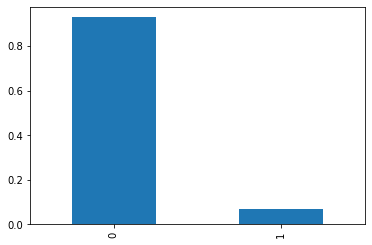

In [3]:
#plot of label distribution
df['label'].value_counts(normalize = True).plot.bar()

In [4]:
#Importing libraries for data cleaning
import re
import nltk
from nltk.corpus import stopwords

In [5]:
def clean_tweet_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #"[^a-zA-Z]" this regex will remove any non-alphabetical char as they are not significant
    words = alpha_only.lower().split()
    stop = set(stopwords.words('english'))
    #from the dataframe we can see 'user' word is quite common in the tweets, which is basically used for tagging someone in the tweet
    #so I will be removing that
    stop.add('user')
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [6]:
# creating a clean_tweet column and adding it to the dataframe
df['clean_tweet']  = df['tweet'].apply(lambda tweet: clean_tweet_words(tweet))

df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso condemns act


In [7]:
#drop tweet and id columns
df.drop(['tweet',"id"],axis=1,inplace=True)

In [8]:
df

,label,clean_tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


In [9]:
df['clean_tweet']

0        father dysfunctional selfish drags kids dysfun...
1        thanks lyft credit use cause offer wheelchair ...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
31957                                        ate isz youuu
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960      sikh temple vandalised calgary wso condemns act
31961                                         thank follow
Name: clean_tweet, Length: 31962, dtype: object

In [10]:
# creating sentiment scores
from nltk.sentiment import SentimentIntensityAnalyzer as VS
sentiment_analyzer = VS()
def other_features(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    features = pd.DataFrame(features)
    return features

In [11]:
def get_feature_array(tweets):
    feats=[]
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)

In [12]:
feats = get_feature_array(df['clean_tweet'])

In [13]:
len(feats)

31962

In [14]:
feats = feats.reshape(31962,4)


In [15]:
len(feats)

31962

In [16]:
feats = pd.DataFrame(feats,columns=["Negative","Positive","Neutral","Compound"])

In [17]:
feats

,Negative,Positive,Neutral,Compound
0,0.655,0.000,0.345,-0.7650
1,0.000,0.379,0.621,0.6705
2,0.000,0.000,1.000,0.0000
3,0.000,0.512,0.488,0.6369
4,0.000,0.545,0.455,0.3400
...,...,...,...,...
31957,0.000,0.000,1.000,0.0000
31958,0.153,0.302,0.545,0.4588
31959,0.508,0.000,0.492,-0.7351
31960,0.355,0.000,0.645,-0.5106


In [18]:
df = pd.concat([df,feats],axis=1)

In [19]:
df

,label,clean_tweet,Negative,Positive,Neutral,Compound
0,0,father dysfunctional selfish drags kids dysfun...,0.655,0.000,0.345,-0.7650
1,0,thanks lyft credit use cause offer wheelchair ...,0.000,0.379,0.621,0.6705
2,0,bihday majesty,0.000,0.000,1.000,0.0000
3,0,model love u take u time ur,0.000,0.512,0.488,0.6369
4,0,factsguide society motivation,0.000,0.545,0.455,0.3400
...,...,...,...,...,...,...
31957,0,ate isz youuu,0.000,0.000,1.000,0.0000
31958,0,see nina turner airwaves trying wrap mantle ge...,0.153,0.302,0.545,0.4588
31959,0,listening sad songs monday morning otw work sad,0.508,0.000,0.492,-0.7351
31960,1,sikh temple vandalised calgary wso condemns act,0.355,0.000,0.645,-0.5106


In [20]:
df[df['label']==0]

,label,clean_tweet,Negative,Positive,Neutral,Compound
0,0,father dysfunctional selfish drags kids dysfun...,0.655,0.000,0.345,-0.7650
1,0,thanks lyft credit use cause offer wheelchair ...,0.000,0.379,0.621,0.6705
2,0,bihday majesty,0.000,0.000,1.000,0.0000
3,0,model love u take u time ur,0.000,0.512,0.488,0.6369
4,0,factsguide society motivation,0.000,0.545,0.455,0.3400
...,...,...,...,...,...,...
31956,0,fishing tomorrow carnt wait first time years,0.000,0.000,1.000,0.0000
31957,0,ate isz youuu,0.000,0.000,1.000,0.0000
31958,0,see nina turner airwaves trying wrap mantle ge...,0.153,0.302,0.545,0.4588
31959,0,listening sad songs monday morning otw work sad,0.508,0.000,0.492,-0.7351


In [21]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size = 0.2,random_state=0)

In [22]:
train_clean_tweet = []
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [23]:
train_clean_tweet

['could ever lose faith pain mistrust relationship outcast twitter life love friendship cruel',
 'name often times auto corrects leukemia',
 'suddenly staing feel real finished jobs',
 'r u foodaholic bt r unable cherish yummy food coz toothaches dnt b whn u r hungry drmitali',
 'sad see country posturing civil war wanton disrespect human rights government amp opposition',
 'trump clinton leading americans choose lesser evil na mds si bernie sanders',
 'today awful keep headuphigh positivevibes bodyposi goodmood veryblessed blessed great feelingood chawdaddy',
 'scream promo happy b hday hd adveise promo x bihday free classifieds ads',
 'know got till gone selfish jesuschristempowerstransformation ask amwriti',
 'hear news jocoxmp murder condolences family amp people birstall westyorkshire yorkshirelass',
 'hell yea friday cant wait conce today',
 'train nyc virginia travel traveling train newyorkcity amtrak',
 'thankful summer thankful positive',
 'tuesday world blood donor day',
 'go

In [24]:
#importing tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
from sklearn.svm import LinearSVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgb
#from sklearn.ensemble import ExtraTreesClassifier
#import xgboost as xgb
#from sklearn.ensemble import AdaBoostClassifier

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [28]:
svc_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('svc', LinearSVC(random_state=0,max_iter=5000))])
#nb_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('nb', MultinomialNB())])
#rf_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('rf', RandomForestClassifier())])
#lgbm_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('lgbm', lgb.LGBMClassifier())])
#etc_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('etc', ExtraTreesClassifier())])
#xgb_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('xgb', xgb.XGBClassifier())])
#adb_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('adb',AdaBoostClassifier())])







In [29]:
svc_pipe.fit(train_clean_tweet,train['label'])

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 4))),
                ('svc', LinearSVC(max_iter=5000, random_state=0))])

In [28]:

nb_pipe.fit(train_clean_tweet,train['label'])
rf_pipe.fit(train_clean_tweet,train['label'])
lgbm_pipe.fit(train_clean_tweet,train['label'])
etc_pipe.fit(train_clean_tweet,train['label'])
xgb_pipe.fit(train_clean_tweet,train['label'])
adb_pipe.fit(train_clean_tweet,train['label'])

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 4))),
                ('adb', AdaBoostClassifier())])

In [30]:
pred_svc = svc_pipe.predict(test_clean_tweet)

In [29]:

pred_nb = nb_pipe.predict(test_clean_tweet)
pred_rf = rf_pipe.predict(test_clean_tweet)
pred_lgbm = lgbm_pipe.predict(test_clean_tweet)
pred_etc = etc_pipe.predict(test_clean_tweet)
pred_xgb = xgb_pipe.predict(test_clean_tweet)
pred_adb = adb_pipe.predict(test_clean_tweet)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
print('SVC')
print(accuracy_score(test['label'],pred_svc))
print('\n')
print(confusion_matrix(test['label'],pred_svc))
print('\n')

SVC
0.9655873611762865


[[5923   62]
 [ 158  250]]




In [33]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_svc )
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.80      0.61      0.69       408

    accuracy                           0.97      6393
   macro avg       0.89      0.80      0.84      6393
weighted avg       0.96      0.97      0.96      6393



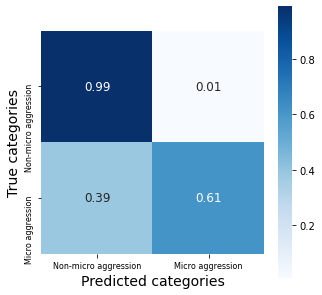

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_svc)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Non-micro aggression','Micro aggression']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=8)

Our classifier is doing good on +ve tweets but some work still needs to be done so as to improve its performance on -ve tweets.

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Naive Bayes Classifier')
print(accuracy_score(test['label'],pred_nb))
print('\n')
print(confusion_matrix(test['label'],pred_nb))
print('\n')


Naive Bayes Classifier
0.9429063037697482


[[5985    0]
 [ 365   43]]




In [35]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_nb )
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5985
           1       1.00      0.11      0.19       408

    accuracy                           0.94      6393
   macro avg       0.97      0.55      0.58      6393
weighted avg       0.95      0.94      0.92      6393



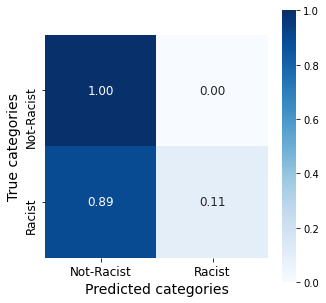

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_nb)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('rf')
print(accuracy_score(test['label'],pred_rf))
print('\n')
print(confusion_matrix(test['label'],pred_rf))
print('\n')

rf
0.9624589394650399


[[5973   12]
 [ 228  180]]




In [38]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_rf )
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5985
           1       0.94      0.44      0.60       408

    accuracy                           0.96      6393
   macro avg       0.95      0.72      0.79      6393
weighted avg       0.96      0.96      0.96      6393



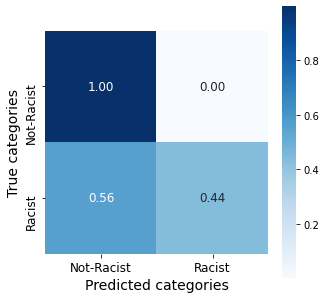

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_rf)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('lgbm')
print(accuracy_score(test['label'],pred_lgbm))
print('\n')
print(confusion_matrix(test['label'],pred_lgbm))
print('\n')

lgbm
0.9507273580478649


[[5897   88]
 [ 227  181]]




In [41]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_lgbm )
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5985
           1       0.67      0.44      0.53       408

    accuracy                           0.95      6393
   macro avg       0.82      0.71      0.75      6393
weighted avg       0.94      0.95      0.95      6393



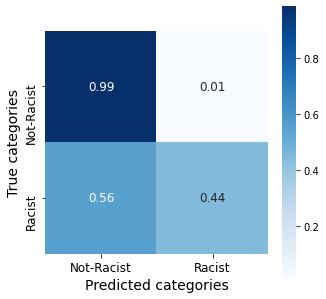

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_lgbm)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('etc')
print(accuracy_score(test['label'],pred_etc))
print('\n')
print(confusion_matrix(test['label'],pred_etc))
print('\n')

etc
0.9648052557484749


[[5969   16]
 [ 209  199]]




In [44]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_etc)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5985
           1       0.93      0.49      0.64       408

    accuracy                           0.96      6393
   macro avg       0.95      0.74      0.81      6393
weighted avg       0.96      0.96      0.96      6393



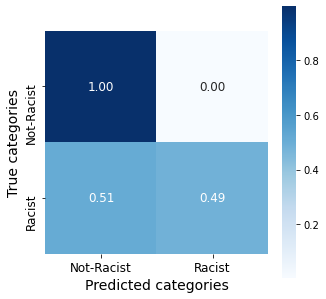

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_etc)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('xgb')
print(accuracy_score(test['label'],pred_xgb))
print('\n')
print(confusion_matrix(test['label'],pred_xgb))
print('\n')

xgb
0.9546378851869232


[[5940   45]
 [ 245  163]]




In [47]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5985
           1       0.78      0.40      0.53       408

    accuracy                           0.95      6393
   macro avg       0.87      0.70      0.75      6393
weighted avg       0.95      0.95      0.95      6393



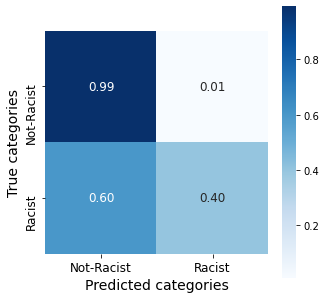

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_xgb)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('adb')
print(accuracy_score(test['label'],pred_adb))
print('\n')
print(confusion_matrix(test['label'],pred_adb))
print('\n')

adb
0.9518223056468011


[[5925   60]
 [ 248  160]]




In [50]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_adb)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5985
           1       0.73      0.39      0.51       408

    accuracy                           0.95      6393
   macro avg       0.84      0.69      0.74      6393
weighted avg       0.94      0.95      0.94      6393



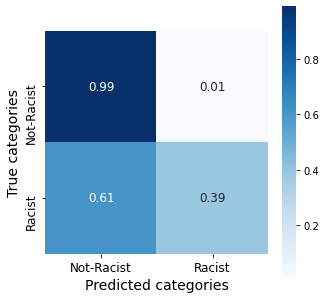

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_adb)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [52]:
from sklearn.neighbors import NearestCentroid
#ncclf1 = NearestCentroid(metric='manhattan',shrink_threshold=0.1)
nc_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),("nc",NearestCentroid())])



In [53]:
nc_pipe.fit(train_clean_tweet,train['label'])
pred_nc = nc_pipe.predict(test_clean_tweet)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('nc')
print(accuracy_score(test['label'],pred_nc))
print('\n')
print(confusion_matrix(test['label'],pred_nc))
print('\n')

nc
0.9424370405130612


[[5814  171]
 [ 197  211]]




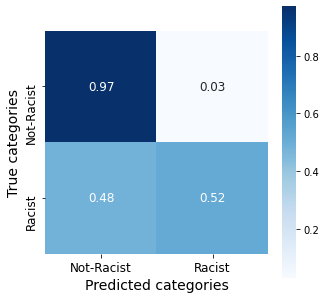

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_nc)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [56]:
from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),("lr",LogisticRegression())])
lr_pipe.fit(train_clean_tweet,train['label'])
pred_lr = lr_pipe.predict(test_clean_tweet)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('lr')
print(accuracy_score(test['label'],pred_lr))
print('\n')
print(confusion_matrix(test['label'],pred_lr))
print('\n')

lr
0.9483810417644298


[[5973   12]
 [ 318   90]]




In [58]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5985
           1       0.88      0.22      0.35       408

    accuracy                           0.95      6393
   macro avg       0.92      0.61      0.66      6393
weighted avg       0.95      0.95      0.93      6393



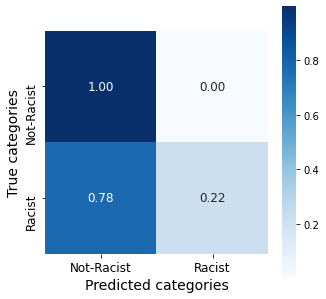

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_lr)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [60]:
from sklearn.linear_model import SGDClassifier
sgd_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('sgd', SGDClassifier())])
sgd_pipe.fit(train_clean_tweet,train['label'])
pred_sgd = sgd_pipe.predict(test_clean_tweet)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('sgd')
print(accuracy_score(test['label'],pred_sgd))
print('\n')
print(confusion_matrix(test['label'],pred_sgd))
print('\n')

sgd
0.9518223056468011


[[5980    5]
 [ 303  105]]




In [62]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_sgd)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5985
           1       0.95      0.26      0.41       408

    accuracy                           0.95      6393
   macro avg       0.95      0.63      0.69      6393
weighted avg       0.95      0.95      0.94      6393



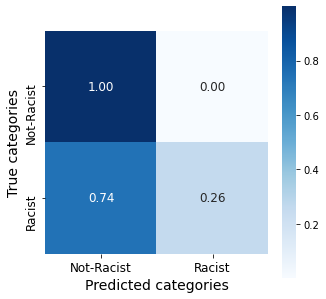

In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_sgd)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [64]:
from sklearn.linear_model import LogisticRegressionCV
lrcv_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('lrcv', LogisticRegressionCV(cv=5))])
lrcv_pipe.fit(train_clean_tweet,train['label'])
pred_lrcv = lrcv_pipe.predict(test_clean_tweet)

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('lrcv')
print(accuracy_score(test['label'],pred_lrcv))
print('\n')
print(confusion_matrix(test['label'],pred_lrcv))
print('\n')

lrcv
0.9666823087752229


[[5948   37]
 [ 176  232]]




In [66]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_lrcv)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.86      0.57      0.69       408

    accuracy                           0.97      6393
   macro avg       0.92      0.78      0.83      6393
weighted avg       0.96      0.97      0.96      6393



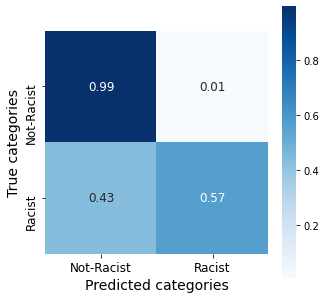

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_lrcv)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [68]:
test = pd.read_csv("test.csv")

In [69]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [70]:
def clean_test_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #"[^a-zA-Z]" this regex will remove any non-alphabetical char as they are not significant
    words = alpha_only.lower().split()
    stop = set(stopwords.words('english'))
    #from the dataframe we can see 'user' word is quite common in the tweets, which is basically used for tagging someone in the tweet
    #so I will be removing that
    stop.add('user')
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [71]:
test['clean_tweet_test']  = test['tweet'].apply(lambda tweet: clean_test_words(tweet))

test.head(10)

,id,tweet,clean_tweet_test
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone see new birds...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal acne altwaystoheal healthy healing
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservations already yes ...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...
5,31968,choose to be :) #momtips,choose momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,something inside dies eyes ness smokeyeyes tir...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finished tattoo inked ink loveit thanks aleeee
8,31971,@user @user @user i will never understand why...,never understand dad left young deep inthefeels
9,31972,#delicious #food #lovelife #capetown mannaep...,delicious food lovelife capetown mannaepicure ...


In [72]:
test.drop(['tweet','id'],axis=1,inplace=True)

In [73]:
test

,clean_tweet_test
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone see new birds...
2,safe ways heal acne altwaystoheal healthy healing
3,hp cursed child book reservations already yes ...
4,rd bihday amazing hilarious nephew eli ahmir u...
...,...
17192,thought factory left right polarisation trump ...
17193,feeling like mermaid hairflip neverready forma...
17194,hillary campaigned today ohio omg amp used wor...
17195,happy work conference right mindset leads cult...


In [74]:
test['clean_tweet_test']

0        studiolife aislife requires passion dedication...
1        white supremacists want everyone see new birds...
2        safe ways heal acne altwaystoheal healthy healing
3        hp cursed child book reservations already yes ...
4        rd bihday amazing hilarious nephew eli ahmir u...
                               ...                        
17192    thought factory left right polarisation trump ...
17193    feeling like mermaid hairflip neverready forma...
17194    hillary campaigned today ohio omg amp used wor...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: clean_tweet_test, Length: 17197, dtype: object

In [75]:
pred_svc2 = svc_pipe.predict(test['clean_tweet_test'])

In [76]:
pred_svc2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
pred_svc2 =pd.DataFrame(pred_svc2)

In [78]:
pred_svc2

,0
0,0
1,0
2,0
3,0
4,0
...,...
17192,1
17193,0
17194,0
17195,0


In [79]:
test

,clean_tweet_test
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone see new birds...
2,safe ways heal acne altwaystoheal healthy healing
3,hp cursed child book reservations already yes ...
4,rd bihday amazing hilarious nephew eli ahmir u...
...,...
17192,thought factory left right polarisation trump ...
17193,feeling like mermaid hairflip neverready forma...
17194,hillary campaigned today ohio omg amp used wor...
17195,happy work conference right mindset leads cult...


In [80]:
test['test_predict'] = pred_svc2

In [81]:
test

,clean_tweet_test,test_predict
0,studiolife aislife requires passion dedication...,0
1,white supremacists want everyone see new birds...,0
2,safe ways heal acne altwaystoheal healthy healing,0
3,hp cursed child book reservations already yes ...,0
4,rd bihday amazing hilarious nephew eli ahmir u...,0
...,...,...
17192,thought factory left right polarisation trump ...,1
17193,feeling like mermaid hairflip neverready forma...,0
17194,hillary campaigned today ohio omg amp used wor...,0
17195,happy work conference right mindset leads cult...,0


In [82]:
test[test['test_predict']==1]

,clean_tweet_test,test_predict
19,thought factory bbc neutrality right wing fasc...,1
26,chick gets fucked hottest naked lady,1
30,never thick women blacktina,1
33,suppo taiji fisherman bullying racism tweet ta...,1
110,hey ivanka bracelet feel good profiting xenoph...,1
...,...,...
17125,careful criticizing obama decision israel amp ...,1
17128,uk government new anti semitism definition con...,1
17176,racist pay ever,1
17188,black professor demonizes proposes nazi style ...,1
